# Final Project 
## Raw Analysis

In [1]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")

# 1. Data Load

## 1.A State Expenditure 2020
Load State Expenditure data for year 2020

In [2]:
State_Expend_byYear = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/Exp Report Data 1991-2021.xlsm')

State_Expend_byYear = State_Expend_byYear.rename(columns={"YEAR": "Exp_Year"})

## 1.A Load Unemployment Data for 2020-2021

In [3]:
# Load unemployment data (12-Month Data (4/1/2020 – 03/31/2021)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_20_21 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2021 - Twelve Months Ending March 31.xlsx', sheet_name='Improper Payment Rates', header = 6, skipfooter = 6)
Unemployment_Data_20_21 = Unemployment_Data_20_21.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "(a)": "Overpayment Rate", 
                                                      "(c)": "Amount Overpaid", 
                                                      "(b)": "Underpayment Rate", 
                                                      "(d)": "Amount Underpaid", 
                                                      "(a)+(b)": "Improper Payment Rate", 
                                                      "(c)+(d)": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Fraud Rate"
                                                     })
Unemployment_Data_20_21.head()
Unemployment_Data_20_21['Unemploy_Year']='2021'

In [4]:
state_abbrev = pd.read_csv('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/stateAbbrev.csv')

In [5]:
Unemployment_Data_20_21 = Unemployment_Data_20_21.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_20_21.head(2)
Unemployment_Data_20_21 = Unemployment_Data_20_21.drop(['StateCode', 'Abbrev','Overpayment Rate excl Work Search','Amount Overpaid excl Work Search'], axis=1)

In [6]:
Unemployment_Data_20_21.shape

(52, 11)

In [7]:
dta_21 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2020].merge(Unemployment_Data_20_21, left_on='STATE', right_on='State', how='left')
dta_21.head()

,Exp_Year,STATE,ELSED_GF,ELSED_FF,ELSED_OF,ELSED_BF,ELSED_TOT,HGRED_GF,HGRED_FF,HGRED_OF,...,Overpayment Rate,Amount Overpaid,Underpayment Rate,Amount Underpaid,Improper Payment Rate,Amount Improperly Paid,Fraud Rate,Unemploy_Year,State,Code
0,2020,Alabama,4882.0,1289.000,212.00,41.0,6424.000,1770.0000,1286.000,3215.0,...,0.23671,1.262395e+08,0.00285,1519078.0,0.23956,1.277586e+08,0.13475,2021,Alabama,AL
1,2020,Alaska,1370.3,262.800,46.80,0.0,1679.900,314.3000,140.000,296.3,...,0.08134,2.554232e+07,0.04325,13582376.0,0.12459,3.912470e+07,0.01785,2021,Alaska,AK
2,2020,Arizona,5193.0,1208.000,414.00,0.0,6815.000,849.3061,1026.000,4924.0,...,0.25343,2.329512e+08,0.00000,0.0,0.25343,2.329512e+08,0.14078,2021,Arizona,AZ
3,2020,Arkansas,2289.5,542.767,782.26,0.0,3614.527,776.1700,7.167,3018.8,...,0.22442,3.859883e+07,0.01726,2968952.0,0.24168,4.156779e+07,0.10602,2021,Arkansas,AR
4,2020,California,52258.0,6954.000,161.00,1495.0,60868.000,16431.0000,5811.000,87.0,...,0.07375,1.222937e+09,0.01559,258463590.0,0.08933,1.481401e+09,0.03080,2021,California,CA


## 1.A Data Load State Gubernatorial Party Status by Year

In [8]:
state_party = pd.read_csv('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/united_states_governors_1775_2020.csv')

In [9]:
state_party.shape

(12345, 5)

In [10]:
state_party.head()

,governor,state,time_in_office,party,year
0,Jeff Colyer,Kansas,2018 - 2019,Republican,2018
1,Jeff Colyer,Kansas,2018 - 2019,Republican,2019
2,Eric Greitens,Missouri,2017 - 2018,Republican,2017
3,Eric Greitens,Missouri,2017 - 2018,Republican,2018
4,Chuck Morse,New Hampshire,2017 - 2017,Republican,2017


## 1.A State Population

In [11]:
state_pop = pd.read_csv('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/nst-est2019-alldata.csv')

In [12]:
state_pop = state_pop[state_pop["STATE"] > 0] # drop regional rows

In [13]:
state_pop.dtypes

SUMLEV           int64
REGION          object
DIVISION        object
STATE            int64
NAME            object
                ...   
RNETMIG2015    float64
RNETMIG2016    float64
RNETMIG2017    float64
RNETMIG2018    float64
RNETMIG2019    float64
Length: 151, dtype: object

In [14]:
state_pop = state_pop.iloc[:, [3,4,7,8,9,10,11,12,13,14,15,16]]

In [15]:
state_pop = pd.wide_to_long(state_pop, ["POPESTIMATE"], i="STATE", j="year")

In [16]:
state_pop.head(1)

,,NAME,POPESTIMATE
STATE,year,,
1,2010,Alabama,4785437


In [17]:
state_pop = state_pop.reset_index()

In [18]:
# state_pop = state_pop.drop('index', axis = 1) # set axis for column headers#

In [19]:
state_pop[state_pop.iloc[:,1]==2019]

,STATE,year,NAME,POPESTIMATE
468,1,2019,Alabama,4903185
469,2,2019,Alaska,731545
470,4,2019,Arizona,7278717
471,5,2019,Arkansas,3017804
472,6,2019,California,39512223
473,8,2019,Colorado,5758736
474,9,2019,Connecticut,3565287
475,10,2019,Delaware,973764
476,11,2019,District of Columbia,705749
477,12,2019,Florida,21477737


In [20]:
state_pop[state_pop['year'] == 2019]

,STATE,year,NAME,POPESTIMATE
468,1,2019,Alabama,4903185
469,2,2019,Alaska,731545
470,4,2019,Arizona,7278717
471,5,2019,Arkansas,3017804
472,6,2019,California,39512223
473,8,2019,Colorado,5758736
474,9,2019,Connecticut,3565287
475,10,2019,Delaware,973764
476,11,2019,District of Columbia,705749
477,12,2019,Florida,21477737


In [21]:
dta_21 = dta_21.merge(state_pop[state_pop.iloc[:,1]==2019], left_on='STATE', right_on='NAME', how='left')

## 1.B State Expenditure 2019 & Unemployment Data for 2020

In [22]:
# Load unemployment data (12-Month Data (4/1/2019 – 03/31/2020)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_19_20 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2020-twelvemonthsendingMarch31.xlsx', sheet_name='Improper Payment Rates', header = 6, skipfooter = 6)
Unemployment_Data_19_20 = Unemployment_Data_19_20.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "(a)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "(b)": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Fraud Rate"
                                                     })
Unemployment_Data_19_20.head()
Unemployment_Data_19_20['Unemploy_Year']='2020'

Unemployment_Data_19_20 = Unemployment_Data_19_20.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')

Unemployment_Data_19_20 = Unemployment_Data_19_20.drop(['Abbrev','Overpayment Rate 2','Unnamed: 10','StateCode','[(b)+(d)-(e)]','(amount paid)]','Errors','Errors.1',], axis=1)
Unemployment_Data_19_20.head(2)
# , 'Abbrev'

,Total Unemployment Paid,Overpayment Rate,Amount Overpaid,Underpayment Rate,Amount Underpaid,Improper Payment Rate,Amount Improperly Paid,Improper Payment Recovered,Unemploy_Year,State,Code
0,79074510.0,0.09142,7228731.0,0.00889,702695.0,0.10030,7931427.0,2831646.0,2020,Alaska,AK
1,140932713.0,0.09557,13468990.0,0.00200,281883.0,0.09757,13750873.0,4890694.0,2020,Alabama,AL


In [23]:
dta_20 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2019].merge(Unemployment_Data_19_20, left_on='STATE', right_on='State', how='left').merge(state_party[state_party['year'] == 2019], left_on='STATE', right_on='state', how='left')
dta_20.drop(['Code','time_in_office','governor','year', 'state'], axis=1)

,Exp_Year,STATE,ELSED_GF,ELSED_FF,ELSED_OF,ELSED_BF,ELSED_TOT,HGRED_GF,HGRED_FF,HGRED_OF,...,Overpayment Rate,Amount Overpaid,Underpayment Rate,Amount Underpaid,Improper Payment Rate,Amount Improperly Paid,Improper Payment Recovered,Unemploy_Year,State,party
0,2019,Alabama,4565.000000,1049.000000,405.000000,24.000000,6043.000000,1655.000000,1129.000000,3137.000000,...,0.09557,13468990.0,0.00200,281883.0,0.09757,13750873.0,4890694.0,2020,Alabama,NaN
1,2019,Alaska,1396.300000,227.400000,41.200000,0.000000,1664.900000,342.700000,124.500000,325.200000,...,0.09142,7228731.0,0.00889,702695.0,0.10030,7931427.0,2831646.0,2020,Alaska,NaN
2,2019,Arizona,4960.000000,1143.000000,407.000000,0.000000,6510.000000,760.311500,994.000000,4464.000000,...,0.10938,20297641.0,0.00005,9478.0,0.10943,20307119.0,14277349.0,2020,Arizona,NaN
3,2019,Arkansas,2262.800000,539.563000,747.702000,0.000000,3550.065000,806.454000,7.171700,3055.500000,...,0.05750,5679941.0,0.00583,576247.0,0.06333,6256188.0,4454572.0,2020,Arkansas,NaN
4,2019,California,53092.000000,7396.000000,50.000000,632.000000,61170.000000,15621.000000,5406.000000,41.000000,...,0.09506,471357995.0,0.00431,21351554.0,0.09936,492709549.0,86965599.0,2020,California,Democrat
5,2019,Colorado,4116.000000,617.000000,1146.000000,0.000000,5879.000000,1082.000000,23.000000,2896.000000,...,0.07709,27526137.0,0.00640,2286826.0,0.08349,29812963.0,6496347.0,2020,Colorado,Democrat
6,2019,Connecticut,3232.000000,591.000000,2.000000,228.000000,4053.000000,654.361649,14.900000,2635.000000,...,0.10836,63380917.0,0.00224,1309745.0,0.11060,64690662.0,6941890.0,2020,Connecticut,Democrat
7,2019,Delaware,1515.400000,202.000000,809.000000,199.000000,2725.400000,249.000000,50.000000,112.000000,...,0.06455,4159641.0,0.00241,155195.0,0.06695,4314837.0,1533673.0,2020,Delaware,NaN
8,2019,Florida,11644.000000,1815.000000,1613.000000,0.000000,15072.000000,4583.000000,100.000000,3423.000000,...,0.08076,24292894.0,0.00096,290174.0,0.08173,24583068.0,10068116.0,2020,Florida,Republican
9,2019,Georgia,10083.105797,2481.916464,436.524951,304.915000,13306.462212,2426.905464,246.000000,5614.222720,...,0.03626,11474049.0,0.00000,0.0,0.03626,11474049.0,8831795.0,2020,Georgia,Republican


In [24]:
dta_20 = dta_20.merge(state_pop[state_pop.iloc[:,1]==2019], left_on='STATE', right_on='NAME', how='left')

In [25]:
dta_20.shape

(51, 113)

## 1.C State Expenditure 2018 & Unemployment Data for 2019

In [26]:
# Load unemployment data (12-Month Data (4/1/2018 – 03/31/2019)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_18_19 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2019-twelvemonthsendingMarch31.xlsx', sheet_name='Improper Payment Rates', header = 6, skipfooter = 6)
Unemployment_Data_18_19 = Unemployment_Data_18_19.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "(a)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "(b)": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Fraud Rate"
                                                     })
Unemployment_Data_18_19.head()
Unemployment_Data_18_19['Unemploy_Year']='2019'

Unemployment_Data_18_19 = Unemployment_Data_18_19.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_18_19.head(2)
Unemployment_Data_18_19 = Unemployment_Data_18_19.drop(['Abbrev','Overpayment Rate 2','Unnamed: 10','StateCode','[(b)+(d)-(e)]','(amount paid)]','Errors','Errors.1',], axis=1)

# , 'Abbrev'

In [27]:
dta_19 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2018].merge(Unemployment_Data_18_19, left_on='STATE', right_on='State', how='left').merge(state_party[state_party['year'] == 2018], left_on='STATE', right_on='state', how='left')
dta_19.drop(['Code','time_in_office','governor','year', 'state'], axis=1)

,Exp_Year,STATE,ELSED_GF,ELSED_FF,ELSED_OF,ELSED_BF,ELSED_TOT,HGRED_GF,HGRED_FF,HGRED_OF,...,Overpayment Rate,Amount Overpaid,Underpayment Rate,Amount Underpaid,Improper Payment Rate,Amount Improperly Paid,Improper Payment Recovered,Unemploy_Year,State,party
0,2018,Alabama,4418.000000,1051.000000,238.000000,27.000000,5734.000000,1597.000000,1085.000000,3012.000000,...,0.07299,10881176.0,0.00046,68529.0,0.07345,10949705.0,6406740.0,2019,Alabama,NaN
1,2018,Alaska,1401.700000,230.000000,38.000000,0.000000,1669.700000,327.000000,119.000000,332.000000,...,0.11389,10080630.0,0.00534,473002.0,0.11923,10553632.0,2813283.0,2019,Alaska,Independent
2,2018,Arizona,4528.000000,1124.000000,407.000000,0.000000,6059.000000,705.000000,912.000000,4678.000000,...,0.15543,31557900.0,0.00006,11538.0,0.15549,31569439.0,17038908.0,2019,Arizona,NaN
3,2018,Arkansas,2258.766615,542.594243,832.742439,0.000000,3634.103297,784.979012,7.431464,3128.912081,...,0.10471,10203598.0,0.00263,256671.0,0.10735,10460269.0,5182674.0,2019,Arkansas,NaN
4,2018,California,48762.000000,6721.000000,50.000000,603.000000,56136.000000,14446.000000,5220.000000,208.000000,...,0.07752,387675371.0,0.00134,6703913.0,0.07886,394379284.0,84138220.0,2019,California,Democrat
5,2018,Colorado,4080.000000,595.000000,4804.000000,0.000000,9479.000000,947.000000,281.000000,4671.000000,...,0.10206,38247246.0,0.00662,2481707.0,0.10868,40728952.0,9155118.0,2019,Colorado,Democrat
6,2018,Connecticut,3084.000000,550.000000,2.000000,518.000000,4154.000000,640.300395,225.000000,2341.000000,...,0.13002,75043360.0,0.00350,2021832.0,0.13353,77065192.0,7600304.0,2019,Connecticut,Democrat
7,2018,Delaware,1435.000000,196.000000,785.000000,129.000000,2545.000000,238.000000,51.000000,113.000000,...,0.06815,4148927.0,0.00265,161478.0,0.07081,4310405.0,1652700.0,2019,Delaware,NaN
8,2018,Florida,11445.000000,1853.000000,1291.000000,0.000000,14589.000000,4546.000000,95.000000,3215.000000,...,0.10016,32216293.0,0.00013,42957.0,0.10029,32259250.0,0.0,2019,Florida,Republican
9,2018,Georgia,9604.915835,2309.644687,383.400653,252.325000,12550.286175,2802.937308,61.210309,6493.377767,...,0.04078,12250762.0,0.00016,48282.0,0.04094,12299045.0,8683103.0,2019,Georgia,Republican


In [28]:
dta_19 = dta_19.merge(state_pop[state_pop.iloc[:,1]==2019], left_on='STATE', right_on='NAME', how='left')

In [29]:
dta_19.shape

(52, 113)

## 1.D State Expenditure 2017 & Unemployment Data for 2018

In [30]:
# Load unemployment data (12-Month Data (4/1/2017 – 03/31/2018)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_17_18 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2018-twelvemonthsendingMarch31.xlsx', sheet_name='Improper Payment Rate', header = 6, skipfooter = 6)
Unemployment_Data_17_18  = Unemployment_Data_17_18.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "(a)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "(b)": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Work Search Rate"
                                                     })
Unemployment_Data_17_18.head()
Unemployment_Data_17_18['Unemploy_Year']='2018'

Unemployment_Data_17_18 = Unemployment_Data_17_18.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_17_18.head(2)
Unemployment_Data_17_18 = Unemployment_Data_17_18.drop(['Work Search Rate','Rate $','Abbrev','Overpayment Rate 2','Sample','StateCode','[(b)+(d)-(e)]','(amount paid)]','Errors','Errors.1',], axis=1)

# , 'Abbrev'

In [31]:
dta_18 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2017].merge(Unemployment_Data_17_18, left_on='STATE', right_on='State', how='left').merge(state_party[state_party['year'] == 2017], left_on='STATE', right_on='state', how='left')
dta_18.drop(['Code','time_in_office','governor','year', 'state'], axis=1)

,Exp_Year,STATE,ELSED_GF,ELSED_FF,ELSED_OF,ELSED_BF,ELSED_TOT,HGRED_GF,HGRED_FF,HGRED_OF,...,Overpayment Rate,Amount Overpaid,Underpayment Rate,Amount Underpaid,Improper Payment Rate,Amount Improperly Paid,Improper Payment Recovered,Unemploy_Year,State,party
0,2017,Alabama,4373.000000,1010.000000,203.000000,60.000000,5646.000000,1566.000000,1183.000000,2821.000000,...,0.10228,16592304.0,0.00101,163782.0,0.10329,16756086.0,5381463,2018,Alabama,Republican
1,2017,Alaska,1378.900000,225.900000,62.700000,0.000000,1667.500000,330.200000,125.800000,318.300000,...,0.05102,5518572.0,0.00891,963777.0,0.05993,6482348.0,4505646,2018,Alaska,Independent
2,2017,Arizona,4321.000000,1173.000000,245.000000,0.000000,5739.000000,698.000000,818.000000,4280.000000,...,0.12135,27700026.0,0.00123,281405.0,0.12259,27981431.0,22493906,2018,Arizona,NaN
3,2017,Arkansas,2240.531649,548.005800,766.648947,0.000000,3555.186396,776.382521,9.217259,2882.102508,...,0.08784,11523068.0,0.00612,803296.0,0.09396,12326364.0,6413802,2018,Arkansas,NaN
4,2017,California,46231.000000,6694.000000,57.000000,150.000000,53132.000000,13694.000000,5001.000000,36.000000,...,0.08033,418195851.0,0.00173,9007190.0,0.08206,427203041.0,81706860,2018,California,Democrat
5,2017,Colorado,3768.000000,602.000000,4703.000000,0.000000,9073.000000,1000.000000,346.000000,3966.000000,...,0.10923,46101728.0,0.00198,837186.0,0.11121,46938914.0,9991456,2018,Colorado,Democrat
6,2017,Connecticut,3247.700000,528.000000,5.000000,278.000000,4058.700000,713.238969,216.290689,2350.590388,...,0.18934,122199828.0,0.00124,802521.0,0.19058,123002349.0,7992220,2018,Connecticut,Democrat
7,2017,Delaware,1415.000000,195.000000,795.000000,133.000000,2538.000000,241.000000,47.000000,115.000000,...,0.08355,5840392.0,0.00410,286549.0,0.08765,6126941.0,1826563,2018,Delaware,Democrat
8,2017,Florida,10939.000000,1722.000000,1319.000000,0.000000,13980.000000,4022.000000,98.000000,3324.000000,...,0.14063,52524030.0,0.00246,918748.0,0.14309,53442778.0,12024624,2018,Florida,Republican
9,2017,Georgia,9083.000000,2319.000000,388.000000,252.000000,12042.000000,2607.000000,59.000000,6267.000000,...,0.03802,12314707.0,0.00017,53510.0,0.03818,12368217.0,9211888,2018,Georgia,Republican


In [32]:
dta_18 = dta_18.merge(state_pop[state_pop.iloc[:,1]==2018], left_on='STATE', right_on='NAME', how='left')

In [33]:
dta_18.shape

(54, 113)

## 1.E State Expenditure 2016 & Unemployment Data for 2017

In [34]:
# Load unemployment data (12-Month Data (4/1/2016 – 03/31/2017)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_16_17 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2017-TwelveMonthsEndingMarch31.xlsx', sheet_name='Improper Payment Rate', header = 6, skipfooter = 11)
Unemployment_Data_16_17  = Unemployment_Data_16_17.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "(a)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "(b)": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Work Search Rate"
                                                     })
Unemployment_Data_16_17.head()
Unemployment_Data_16_17['Unemploy_Year']='2017'

Unemployment_Data_16_17 = Unemployment_Data_16_17.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_16_17 = Unemployment_Data_16_17.drop(['Unnamed: 9','Overpayment Rate 2'], axis=1)
Unemployment_Data_16_17.shape
# , 'Abbrev'

(52, 12)

In [35]:
dta_17 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2016].merge(Unemployment_Data_16_17, left_on='STATE', right_on='State', how='left').merge(state_party[state_party['year'] == 2016], left_on='STATE', right_on='state', how='left')
dta_17.drop(['Code','time_in_office','governor','year', 'state'], axis=1)

,Exp_Year,STATE,ELSED_GF,ELSED_FF,ELSED_OF,ELSED_BF,ELSED_TOT,HGRED_GF,HGRED_FF,HGRED_OF,...,Overpayment Rate,Amount Overpaid,Underpayment Rate,Amount Underpaid,Improper Payment Rate,Amount Improperly Paid,Unemploy_Year,State,Abbrev,party
0,2016,Alabama,4157.000000,1008.000000,189.000000,58.00000,5412.000000,1493.000000,1175.000000,2634.000000,...,0.10267,19269160.0,0.00047,88064.0,0.10314,19357225.0,2017,Alabama,Ala.,Republican
1,2016,Alaska,1429.100000,207.700000,51.800000,0.00000,1688.600000,362.000000,128.000000,316.000000,...,0.09382,12707751.0,0.00326,441903.0,0.09708,13149653.0,2017,Alaska,Alaska,Independent
2,2016,Arizona,4197.000000,1129.000000,1202.000000,172.00000,6700.000000,863.000000,760.000000,4092.000000,...,0.08357,21270210.0,0.00011,27895.0,0.08368,21298105.0,2017,Arizona,Ariz.,NaN
3,2016,Arkansas,2228.259081,539.699993,759.631344,0.00000,3527.590418,772.362896,9.316845,2691.845519,...,0.06758,10296470.0,0.00378,576697.0,0.07136,10873167.0,2017,Arkansas,Ark.,NaN
4,2016,California,45118.000000,6416.000000,44.000000,266.00000,51844.000000,12948.000000,4963.000000,23.000000,...,0.07321,399063049.0,0.00403,21954448.0,0.07724,421017497.0,2017,California,Calif.,Democrat
5,2016,Colorado,3478.000000,628.000000,4598.000000,0.00000,8704.000000,1016.000000,357.000000,4038.000000,...,0.13973,71205610.0,0.00805,4104334.0,0.14779,75309945.0,2017,Colorado,Colo.,Democrat
6,2016,Connecticut,3332.000000,525.000000,6.000000,896.00000,4759.000000,781.000000,292.000000,1560.000000,...,0.17011,115507506.0,0.00227,1541923.0,0.17238,117049429.0,2017,Connecticut,Conn.,Democrat
7,2016,Delaware,1337.000000,200.000000,763.000000,102.00000,2402.000000,236.000000,51.000000,118.000000,...,0.05031,3741347.0,0.00799,594020.0,0.05829,4335367.0,2017,Delaware,Del.,Democrat
8,2016,Florida,10639.000000,1774.000000,1141.000000,0.00000,13554.000000,3839.000000,90.000000,3088.000000,...,0.08003,30892228.0,0.00092,353315.0,0.08095,31245543.0,2017,Florida,Fla.,Republican
9,2016,Georgia,8465.000000,2317.000000,583.000000,272.00000,11637.000000,2442.000000,62.000000,6025.000000,...,0.05006,17309350.0,0.00030,105406.0,0.05036,17414757.0,2017,Georgia,Ga.,Republican


In [36]:
dta_17 = dta_17.merge(state_pop[state_pop.iloc[:,1]==2017], left_on='STATE', right_on='NAME', how='left')

In [37]:
dta_17.shape # check 51 rows

(52, 114)

## 1.F State Expenditure 2015 & Unemployment Data for 2016

In [38]:
# Load unemployment data (12-Month Data (4/1/2015 – 03/31/2016)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_15_16 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2016-TwelveMonthsEndingMarch31.xlsx', sheet_name='Improper Payment Rate', header = 8, skipfooter = 6)
Unemployment_Data_15_16  = Unemployment_Data_15_16.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "(a)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "(b)": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Work Search Rate"
                                                     })
Unemployment_Data_15_16.head()
Unemployment_Data_15_16['Unemploy_Year']='2016'

Unemployment_Data_15_16 = Unemployment_Data_15_16.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_15_16 = Unemployment_Data_15_16.drop(['Work Search Rate','Rate $','Abbrev','StateCode','[(b)+(d)-(e)]','(amount paid)]','Errors','Errors.1'], axis=1)
Unemployment_Data_15_16.head()
# , 'Abbrev'

,Total Unemployment Paid,Overpayment Rate,Amount Overpaid,Underpayment Rate,Amount Underpaid,Improper Payment Rate,Amount Improperly Paid,Improper Payment Recovered,Unemploy_Year,State,Code
0,125269534,0.10358,12975040,0.00170,213330,0.10528,13188370,4076621,2016,Alaska,AK
1,203285637,0.06134,12469708,0.00399,811589,0.06533,13281297,11215354,2016,Alabama,AL
2,223389486,0.10092,22544479,0.00559,1248120,0.10651,23792599,10626306,2016,Arkansas,AR
3,264569022,0.07693,20353647,0.00091,240816,0.07784,20594463,23167626,2016,Arizona,AZ
4,5263022268,0.06874,361768920,0.00730,38442457,0.07604,400211377,96301843,2016,California,CA


In [39]:
dta_16 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2015].merge(Unemployment_Data_15_16, left_on='STATE', right_on='State', how='left').merge(state_party[state_party['year'] == 2015], left_on='STATE', right_on='state', how='left')
dta_16.drop(['Code','time_in_office','governor','year', 'state'], axis=1)

,Exp_Year,STATE,ELSED_GF,ELSED_FF,ELSED_OF,ELSED_BF,ELSED_TOT,HGRED_GF,HGRED_FF,HGRED_OF,...,Overpayment Rate,Amount Overpaid,Underpayment Rate,Amount Underpaid,Improper Payment Rate,Amount Improperly Paid,Improper Payment Recovered,Unemploy_Year,State,party
0,2015,Alabama,4109.000000,964.000000,185.000000,0.0,5258.000000,1466.000000,1224.000000,2510.000000,...,0.06134,12469708.0,0.00399,811589.0,0.06533,13281297.0,11215354.0,2016,Alabama,Republican
1,2015,Alaska,1405.430500,214.321300,32.646700,0.0,1652.398500,490.392100,125.004500,311.695700,...,0.10358,12975040.0,0.00170,213330.0,0.10528,13188370.0,4076621.0,2016,Alaska,Independent
2,2015,Arizona,3780.000000,1141.000000,692.000000,0.0,5613.000000,843.000000,645.000000,4491.000000,...,0.07693,20353647.0,0.00091,240816.0,0.07784,20594463.0,23167626.0,2016,Arizona,Republican
3,2015,Arkansas,2181.100000,533.500000,760.800000,0.0,3475.400000,777.000000,8.900000,2789.000000,...,0.10092,22544479.0,0.00559,1248120.0,0.10651,23792599.0,10626306.0,2016,Arkansas,Democrat
4,2015,California,46212.000000,6519.000000,-161.000000,1054.0,53624.000000,12190.000000,4907.000000,54.000000,...,0.06874,361768920.0,0.00730,38442457.0,0.07604,400211377.0,96301843.0,2016,California,Democrat
5,2015,Colorado,3357.000000,591.000000,4675.000000,0.0,8623.000000,869.000000,343.000000,3788.000000,...,0.12197,63535315.0,0.00848,4414893.0,0.13044,67950208.0,10045985.0,2016,Colorado,Democrat
6,2015,Colorado,3357.000000,591.000000,4675.000000,0.0,8623.000000,869.000000,343.000000,3788.000000,...,0.12197,63535315.0,0.00848,4414893.0,0.13044,67950208.0,10045985.0,2016,Colorado,Democrat
7,2015,Connecticut,3277.000000,489.000000,2.000000,528.0,4296.000000,731.000000,292.000000,1451.000000,...,0.10782,68504012.0,0.00158,1004266.0,0.10940,69508279.0,8834459.0,2016,Connecticut,Democrat
8,2015,Connecticut,3277.000000,489.000000,2.000000,528.0,4296.000000,731.000000,292.000000,1451.000000,...,0.10782,68504012.0,0.00158,1004266.0,0.10940,69508279.0,8834459.0,2016,Connecticut,Democrat
9,2015,Delaware,1278.000000,209.000000,747.000000,98.0,2332.000000,232.000000,56.000000,118.000000,...,0.08475,6486501.0,0.00366,279782.0,0.08841,6766283.0,2748102.0,2016,Delaware,Democrat


In [40]:
dta_16 = dta_16.merge(state_pop[state_pop.iloc[:,1]==2016], left_on='STATE', right_on='NAME', how='left')

In [41]:
dta_16.shape # check rows

(58, 113)

## 1.G State Expenditure 2014 & Unemployment Data for 2015

In [42]:
# Load unemployment data (12-Month Data (4/1/2014 – 03/31/2015)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_14_15 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2015-12-MonthData.xls', sheet_name='Improper Payment Rate', header = 6, skipfooter = 6)
Unemployment_Data_14_15  = Unemployment_Data_14_15.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "OP (1)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "OP (1).1": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Underpayment Rate",
                                                       "Rate $": "Underpayment Rate $",
                                                      "Rate.1":"Improper Payment Rate",
                                                        "Dollars": "Improper Payment Rate",
                                                        "Recovered": "Dollars Recovered",
                                                    "Paid": "Amount Improperly Paid",
                                                     })
Unemployment_Data_14_15.head()
Unemployment_Data_14_15['Unemploy_Year']='2015'

Unemployment_Data_14_15 = Unemployment_Data_14_15.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_14_15 = Unemployment_Data_14_15.drop(['Dollars Recovered','Underpayment Rate $','Abbrev','StateCode'], axis=1)
Unemployment_Data_14_15.head()
# , 'Abbrev'

,Total Unemployment Paid,Overpayment Rate,Amount Overpaid,Underpayment Rate,Improper Payment Rate,Amount Improperly Paid,Improper Payment Rate,Unemploy_Year,State,Code
0,1.343778e+08,0.16501,22173706.0,0.00248,22506428.0,18344126.0,0.136512,2015,Alaska,AK
1,2.339668e+08,0.06192,14487848.0,0.00039,14578224.0,2399676.0,0.010256,2015,Alabama,AL
2,2.456021e+08,0.10511,25815329.0,0.00709,27557681.0,17595429.0,0.071642,2015,Arkansas,AR
3,3.065588e+08,0.12206,37417044.0,0.00079,37658327.0,9364651.0,0.030548,2015,Arizona,AZ
4,5.742496e+09,0.07445,427502592.0,0.00231,440788511.0,388163048.0,0.067595,2015,California,CA


In [43]:
dta_15 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2014].merge(Unemployment_Data_14_15, left_on='STATE', right_on='State', how='left').merge(state_party[state_party['year'] == 2014], left_on='STATE', right_on='state', how='left')
dta_15.drop(['Code','time_in_office','governor','year', 'state'], axis=1)

,Exp_Year,STATE,ELSED_GF,ELSED_FF,ELSED_OF,ELSED_BF,ELSED_TOT,HGRED_GF,HGRED_FF,HGRED_OF,...,Total Unemployment Paid,Overpayment Rate,Amount Overpaid,Underpayment Rate,Improper Payment Rate,Amount Improperly Paid,Improper Payment Rate,Unemploy_Year,State,party
0,2014,Alabama,4017.000000,919.000000,181.000000,0.000000,5117.000000,1496.000000,1300.000000,2365.000000,...,2.339668e+08,0.06192,14487848.0,0.00039,14578224.0,2399676.0,0.010256,2015,Alabama,Republican
1,2014,Alaska,1358.670000,210.440000,32.720000,0.000000,1601.830000,481.320000,127.710000,308.170000,...,1.343778e+08,0.16501,22173706.0,0.00248,22506428.0,18344126.0,0.136512,2015,Alaska,Independent
2,2014,Alaska,1358.670000,210.440000,32.720000,0.000000,1601.830000,481.320000,127.710000,308.170000,...,1.343778e+08,0.16501,22173706.0,0.00248,22506428.0,18344126.0,0.136512,2015,Alaska,Republican
3,2014,Arizona,3662.000000,1075.000000,592.000000,0.000000,5329.000000,783.000000,692.000000,3105.000000,...,3.065588e+08,0.12206,37417044.0,0.00079,37658327.0,9364651.0,0.030548,2015,Arizona,Republican
4,2014,Arkansas,2103.200000,519.400000,815.400000,0.000000,3438.000000,778.100000,13.000000,2750.300000,...,2.456021e+08,0.10511,25815329.0,0.00709,27557681.0,17595429.0,0.071642,2015,Arkansas,Democrat
5,2014,California,39221.000000,6198.000000,-152.000000,1054.000000,46321.000000,10675.000000,5160.000000,14.000000,...,5.742496e+09,0.07445,427502592.0,0.00231,440788511.0,388163048.0,0.067595,2015,California,Democrat
6,2014,Colorado,3199.000000,594.000000,4169.000000,0.000000,7962.000000,703.000000,385.000000,1424.000000,...,4.980157e+08,0.15336,76375607.0,0.00732,80022317.0,69378742.0,0.139310,2015,Colorado,Democrat
7,2014,Connecticut,3040.000000,475.000000,2.000000,627.700000,4144.700000,1144.000000,235.000000,734.000000,...,7.154016e+08,0.04687,33534015.0,0.00184,34847837.0,26198911.0,0.036621,2015,Connecticut,Democrat
8,2014,Delaware,1243.000000,208.000000,700.000000,168.000000,2319.000000,235.000000,65.000000,124.000000,...,8.377922e+07,0.16394,13734713.0,0.00129,13843156.0,8854192.0,0.105685,2015,Delaware,Democrat
9,2014,Florida,10020.000000,1950.000000,1116.000000,0.000000,13086.000000,3524.000000,95.000000,1111.000000,...,NaN,0.00000,0.0,NaN,NaN,NaN,NaN,2015,Florida,Republican


In [44]:
dta_15 = dta_15.merge(state_pop[state_pop.iloc[:,1]==2015], left_on='STATE', right_on='NAME', how='left')

In [45]:
dta_15.shape

(53, 112)

## 1.H State Expenditure 2013 & Unemployment Data for 2014

In [46]:
# Load unemployment data (12-Month Data (4/1/2013 – 03/31/2014)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_13_14 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2014-12-MonthData.xls', sheet_name='Integrity Rate', header = 7, skipfooter = 6)
Unemployment_Data_13_14  = Unemployment_Data_13_14.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "OP (1)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "OP (1).1": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                       "Rate $": "Underpayment Rate $",
                                                      "Rate.1":"Fraud Rate",
                                                        "Dollars": "Improper Payment Rate",
                                                        "Recovered": "Dollars Recovered",
                                                    "Paid": "Amount Improperly Paid",
                                                     "(OP)": "Overpayment Rate",
                                                        "(UP)": "Underpayment Rate",
                                                    "Rates": "Improper Payment Rate",   
                                                 "OP+UP-Reco": "Improper Payment Rate Less Recov",

                                                                   
                                                     })
Unemployment_Data_13_14.head()
Unemployment_Data_13_14['Unemploy_Year']='2014'

Unemployment_Data_13_14 = Unemployment_Data_13_14.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_13_14 = Unemployment_Data_13_14.drop(['OP+UP-Recov','Rate','Abbrev','StateCode'], axis=1)
Unemployment_Data_13_14.head()
# , 'Abbrev'

,Total Unemployment Paid,Overpayment Rate,Underpayment Rate,Improper Payment Rate,Fraud Rate,Unemploy_Year,State,Code
0,1.590150e+08,0.07238,0.00885,0.08124,0.02745,2014,Alaska,AK
1,2.851954e+08,0.09533,0.00101,0.09634,0.03045,2014,Alabama,AL
2,3.010971e+08,0.09707,0.00270,0.09977,0.05268,2014,Arkansas,AR
3,3.352142e+08,0.12417,0.00049,0.12466,0.05354,2014,Arizona,AZ
4,6.188412e+09,0.06677,0.00188,0.06865,0.04561,2014,California,CA


In [47]:
dta_14 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2013].merge(Unemployment_Data_13_14, left_on='STATE', right_on='State', how='left').merge(state_party[state_party['year'] == 2013], left_on='STATE', right_on='state', how='left')
dta_14.drop(['Code','time_in_office','governor','year', 'state'], axis=1)

,Exp_Year,STATE,ELSED_GF,ELSED_FF,ELSED_OF,ELSED_BF,ELSED_TOT,HGRED_GF,HGRED_FF,HGRED_OF,...,OTHER,TOTAL REV,Total Unemployment Paid,Overpayment Rate,Underpayment Rate,Improper Payment Rate,Fraud Rate,Unemploy_Year,State,party
0,2013,Alabama,3773.000000,967.000000,273.000000,0.000000,5013.000000,1456.000000,1198.000000,2236.000000,...,2035.000000,7409.000,2.851954e+08,0.09533,0.00101,0.09634,0.03045,2014,Alabama,Republican
1,2013,Alaska,1364.000000,209.000000,32.000000,0.000000,1605.000000,586.000000,131.000000,322.000000,...,6382.100000,6931.700,1.590150e+08,0.07238,0.00885,0.08124,0.02745,2014,Alaska,Republican
2,2013,Arizona,3465.000000,1119.000000,544.000000,0.000000,5128.000000,724.000000,805.000000,3139.000000,...,754.116000,8655.987,3.352142e+08,0.12417,0.00049,0.12466,0.05354,2014,Arizona,Republican
3,2013,Arkansas,2055.600000,518.500000,767.200000,0.000000,3341.300000,780.800000,12.700000,2516.100000,...,478.200000,6214.100,3.010971e+08,0.09707,0.00270,0.09977,0.05268,2014,Arkansas,Democrat
4,2013,California,37979.000000,6307.000000,127.000000,872.000000,45285.000000,9014.000000,4868.000000,42.000000,...,6652.000000,99402.000,6.188412e+09,0.06677,0.00188,0.06865,0.04561,2014,California,Democrat
5,2013,Colorado,3015.000000,614.000000,3918.000000,0.000000,7547.000000,642.000000,438.000000,1330.000000,...,-144.316000,8554.838,5.515759e+08,0.10544,0.00725,0.11269,0.01243,2014,Colorado,Democrat
6,2013,Connecticut,2880.000000,484.000000,3.000000,562.900000,3929.900000,627.000000,359.000000,1660.000000,...,5434.000000,19405.000,7.846250e+08,0.04296,0.00227,0.04523,0.02024,2014,Connecticut,Democrat
7,2013,Delaware,1194.000000,211.000000,681.000000,141.000000,2227.000000,227.000000,65.000000,114.000000,...,2440.000000,3730.000,1.013620e+08,0.12815,0.01060,0.13875,0.03583,2014,Delaware,Democrat
8,2013,Florida,9106.000000,1893.000000,1004.000000,0.000000,12003.000000,2938.000000,101.000000,916.000000,...,4571.000000,25314.600,NaN,NaN,NaN,NaN,NaN,2014,Florida,Republican
9,2013,Georgia,7379.500000,2353.000000,334.100000,166.900000,10233.500000,2097.500000,61.600000,5461.800000,...,3449.200000,18295.900,6.487496e+08,0.10816,0.00000,0.10816,0.00963,2014,Georgia,Republican


In [48]:
dta_14 = dta_14.merge(state_pop[state_pop.iloc[:,1]==2014], left_on='STATE', right_on='NAME', how='left')

In [49]:
dta_14.shape # check rows

(55, 110)

## 2 Combine all the individual tables
Expenditure and unemployment data, 2016 - 2021

In [50]:
dta_21 = dta_21.reset_index()
dta_20 = dta_20.reset_index()
dta_19 = dta_19.reset_index()
dta_18 = dta_18.reset_index()
dta_17 = dta_17.reset_index()
dta_16 = dta_16.reset_index()

# giving me issues in concat - will resolve later
dta_15 = dta_15.reset_index() 
dta_14 = dta_14.reset_index()

In [51]:
dta_comb = pd.concat([dta_21,dta_20, dta_19, dta_18, dta_17, dta_16], sort = False)

In [52]:
dta_comb.shape # check all data loaded

(318, 118)

In [53]:
# Select only the columns we care about
dta_select = dta_comb[["POPESTIMATE","Amount Overpaid", "Total Unemployment Paid", "Improper Payment Rate", "Fraud Rate", "Unemploy_Year", "State", "Code", "FFTOT_CAPI", "OTHCP_FF", "TOTAL_CAPI", "GFTOT_CAPI", "OFTOT_CAPI", "FFTOT_CAP", "TOTAL REV","party"]]

In [54]:
dta_select.shape

(318, 16)

<AxesSubplot:>

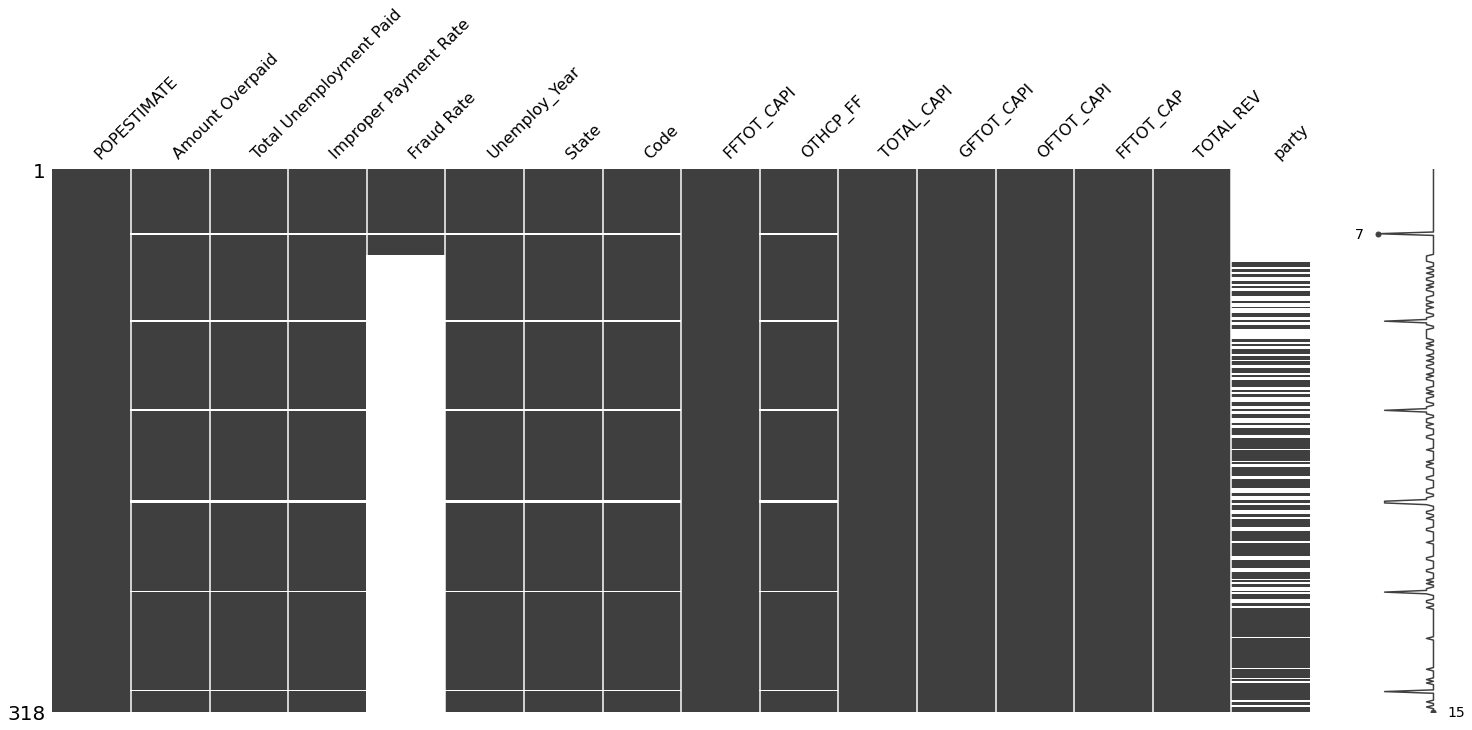

In [55]:
miss.matrix(dta_select) # None

In [56]:
#dta_select = dta_select.dropna()

In [57]:
dta_select.dtypes

POPESTIMATE                  int64
Amount Overpaid            float64
Total Unemployment Paid    float64
Improper Payment Rate      float64
Fraud Rate                 float64
Unemploy_Year               object
State                       object
Code                        object
FFTOT_CAPI                 float64
OTHCP_FF                   float64
TOTAL_CAPI                 float64
GFTOT_CAPI                 float64
OFTOT_CAPI                 float64
FFTOT_CAP                  float64
TOTAL REV                  float64
party                       object
dtype: object

In [58]:
dta_select = dta_select.rename(columns={"Improper Payment Rate": "Improper_Payment_Rate"})

In [59]:
dta_select = dta_select[dta_select['Code'].notna()]

In [60]:
list(dta_select)

['POPESTIMATE',
 'Amount Overpaid',
 'Total Unemployment Paid',
 'Improper_Payment_Rate',
 'Fraud Rate',
 'Unemploy_Year',
 'State',
 'Code',
 'FFTOT_CAPI',
 'OTHCP_FF',
 'TOTAL_CAPI',
 'GFTOT_CAPI',
 'OFTOT_CAPI',
 'FFTOT_CAP',
 'TOTAL REV',
 'party']

In [61]:
# Drop all observations where the outcome is missing 
dta_select = dta_select[~dta_select.Improper_Payment_Rate.isna()]

In [62]:
# Change datatypes
dta_select["Unemploy_Year"] = dta_select["Unemploy_Year"].astype('int32')
dta_select["party"] = dta_select["party"].astype('category')
#.

In [63]:
dta_select.head()

,POPESTIMATE,Amount Overpaid,Total Unemployment Paid,Improper_Payment_Rate,Fraud Rate,Unemploy_Year,State,Code,FFTOT_CAPI,OTHCP_FF,TOTAL_CAPI,GFTOT_CAPI,OFTOT_CAPI,FFTOT_CAP,TOTAL REV,party
0,4903185,1.262395e+08,5.333130e+08,0.23956,0.13475,2021,Alabama,AL,12274.00000,0.000,31638.00000,10172.00000,8966.000,277.000,10040.0,NaN
1,731545,2.554232e+07,3.140269e+08,0.12459,0.01785,2021,Alaska,AK,4807.00000,42.800,11930.20000,5716.00000,1407.200,1076.700,1595.5,NaN
2,7278717,2.329512e+08,9.191844e+08,0.25343,0.14078,2021,Arizona,AZ,16895.00000,0.000,40784.00000,11221.00000,12180.000,900.000,10970.0,NaN
3,3017804,3.859883e+07,1.719952e+08,0.24168,0.10602,2021,Arkansas,AR,9498.46438,0.000,27775.39135,5482.48797,12738.776,205.630,6967.8,NaN
4,39512223,1.222937e+09,1.658302e+10,0.08933,0.03080,2021,California,CA,148996.02000,40.142,357086.00300,146285.32100,55086.253,1966.142,144375.0,NaN


In [64]:
dta_select.to_csv('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/raw_Data.csv')

In [65]:
dta_viz = dta_select

In [132]:
list(dta_viz)

['POPESTIMATE',
 'Amount Overpaid',
 'Total Unemployment Paid',
 'Improper_Payment_Rate',
 'Fraud Rate',
 'Unemploy_Year',
 'State',
 'Code',
 'FFTOT_CAPI',
 'OTHCP_FF',
 'TOTAL_CAPI',
 'GFTOT_CAPI',
 'OFTOT_CAPI',
 'FFTOT_CAP',
 'TOTAL REV',
 'party']

## 3 Split data set to view and explore
Expenditure and unemployment data, 2016 - 2021

In [153]:
d = dta_viz.groupby(['State']).mean()
d

,POPESTIMATE,Amount Overpaid,Total Unemployment Paid,Improper_Payment_Rate,Fraud Rate,Unemploy_Year,FFTOT_CAPI,OTHCP_FF,TOTAL_CAPI,GFTOT_CAPI,OFTOT_CAPI,FFTOT_CAP,TOTAL REV,party
State,,,,,,,,,,,,,,
Alabama,4.889208e+06,3.315347e+07,2.294206e+08,0.113723,0.13475,2018.500000,10313.666667,0.000000,27618.666667,8556.833333,8307.500000,279.166667,8698.000000,0.500000
Alaska,7.351550e+05,1.234217e+07,1.417516e+08,0.101068,0.01785,2018.500000,3703.886869,52.478905,11107.442755,5342.477043,2031.169010,1198.692485,1963.266667,0.000000
Arizona,7.163209e+06,5.902178e+07,3.425219e+08,0.133743,0.14078,2018.500000,14782.983333,0.000000,38603.983333,10053.500000,13277.000000,667.666667,10146.726833,0.166667
Arkansas,3.009068e+06,1.647440e+07,1.458615e+08,0.114032,0.10602,2018.500000,7933.924431,2.252047,25342.959918,5316.234373,12019.407176,383.305032,6719.133333,0.000000
California,3.942065e+07,5.434998e+08,7.077053e+09,0.083815,0.03080,2018.500000,102437.648833,34.610000,281609.804833,126438.661833,48324.078333,2258.443333,128630.939167,0.000000
Colorado,5.665401e+06,1.323538e+08,6.450986e+08,0.151670,0.06695,2018.142857,9471.628571,7.000000,35408.171429,10735.728571,15010.814286,7.285714,11392.554857,0.000000
Connecticut,3.570994e+06,1.199076e+08,8.083145e+08,0.142677,0.04797,2018.142857,6180.376509,0.000000,32323.703486,18224.276117,5029.193717,481.142857,18155.707633,0.000000
Delaware,9.654192e+05,8.100916e+06,8.619211e+07,0.085632,0.02403,2018.500000,2330.988333,0.000000,10789.814833,4146.335000,3973.374833,267.666667,4200.000000,0.000000
Florida,2.112401e+07,1.378473e+08,5.727341e+08,0.131640,0.06212,2018.142857,26779.714286,0.000000,76839.142857,30398.428571,18034.000000,2667.142857,29897.428571,0.857143


In [154]:
list(d)

['POPESTIMATE',
 'Amount Overpaid',
 'Total Unemployment Paid',
 'Improper_Payment_Rate',
 'Fraud Rate',
 'Unemploy_Year',
 'FFTOT_CAPI',
 'OTHCP_FF',
 'TOTAL_CAPI',
 'GFTOT_CAPI',
 'OFTOT_CAPI',
 'FFTOT_CAP',
 'TOTAL REV',
 'party']

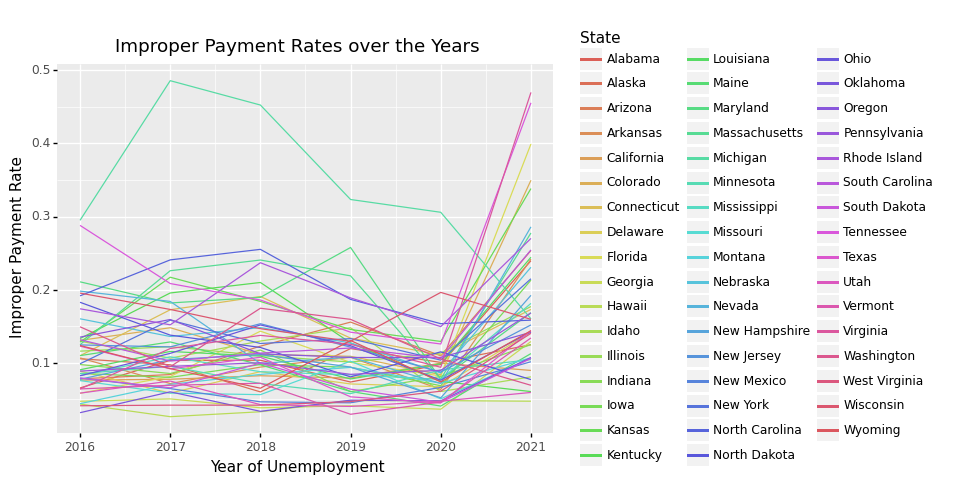

<ggplot: (311843533)>

In [161]:
(
    ggplot(dta_viz,aes(x="Unemploy_Year", 
                       y="Improper_Payment_Rate",
                      color="State")) +
    xlab('Year of Unemployment') + 
    ylab('Improper Payment Rate') +
    ggtitle('Improper Payment Rates over the Years') +
    geom_line()
)


<AxesSubplot:xlabel='State'>

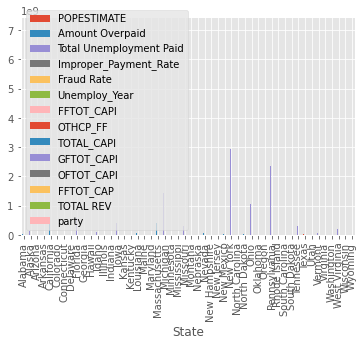

In [139]:
dta_viz.groupby(by = "State").mean().plot(kind = "bar")

In [135]:
df_sorted = dta_viz.sort_values('Im')

plt.bar(dta_viz['State'], dta_viz['Improper_Payment_Rate'])

SyntaxError: unexpected EOF while parsing (2287538984.py, line 3)

In [66]:
y = dta_select['Improper_Payment_Rate'] # OUTCOME
X = dta_select.drop(columns=['Improper_Payment_Rate']) # PREDICTORS

In [67]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1800)

In [68]:
# Check data divided properly
print(train_X.shape[0]/dta_select.shape[0])
print(test_X.shape[0]/dta_select.shape[0])

0.7491961414790996
0.2508038585209003


## 4 Explore Training Set

In [69]:
# Look at the training data
train_X.shape 

(233, 15)

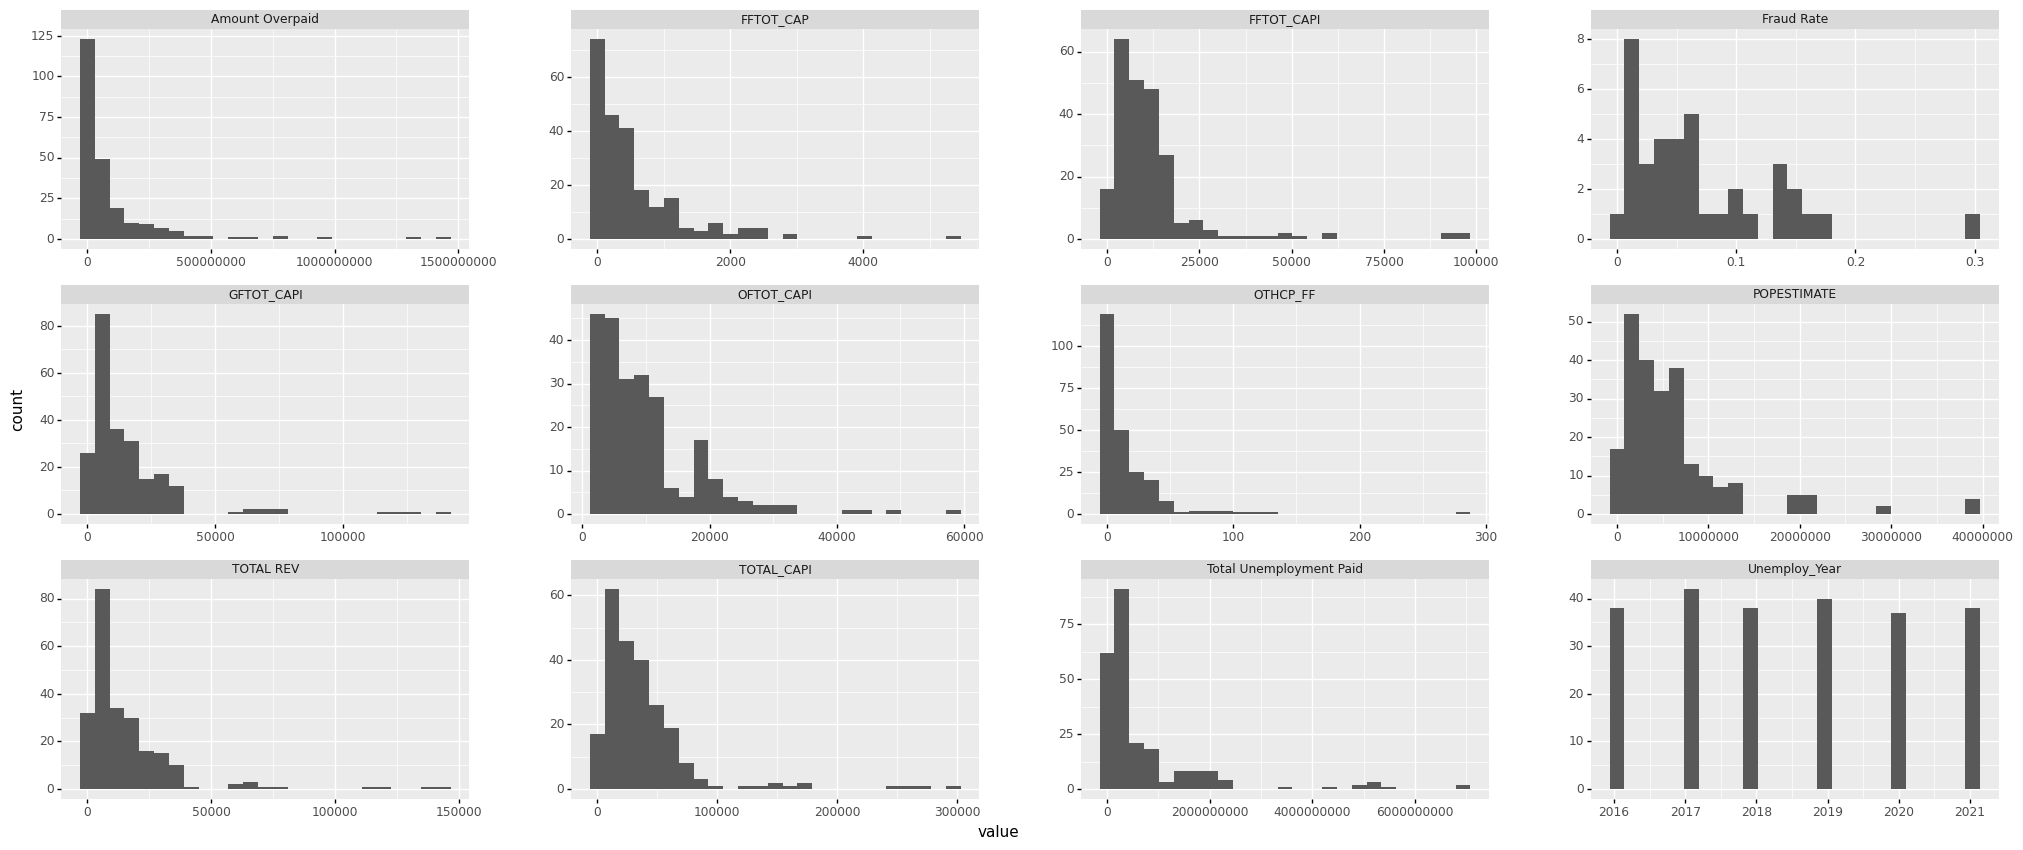

<ggplot: (310023373)>

In [70]:
# Plot the continuous Variables 
d = train_X.select_dtypes(include=["int","float64"]).melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(25,10),
          subplots_adjust={'wspace':0.25, 'hspace':0.25})
)

## 5 Pre-process continuous variables

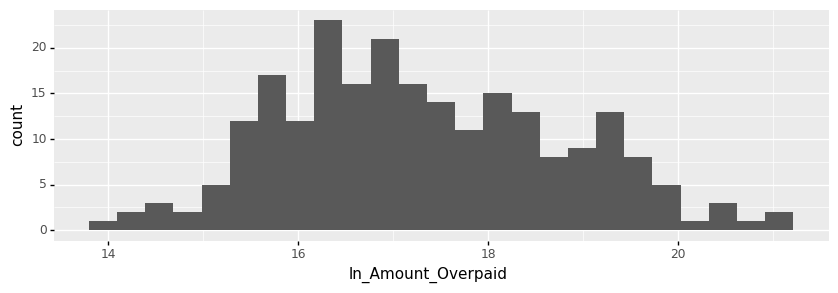

<ggplot: (310039420)>

In [71]:
# Ln(Amount Overpaid) because there is a right skew on Amount Overpaid
d = train_X.copy()
d['ln_Amount_Overpaid'] =  np.log(d['Amount Overpaid'] + 1)
(
    ggplot(d,aes(x="ln_Amount_Overpaid")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

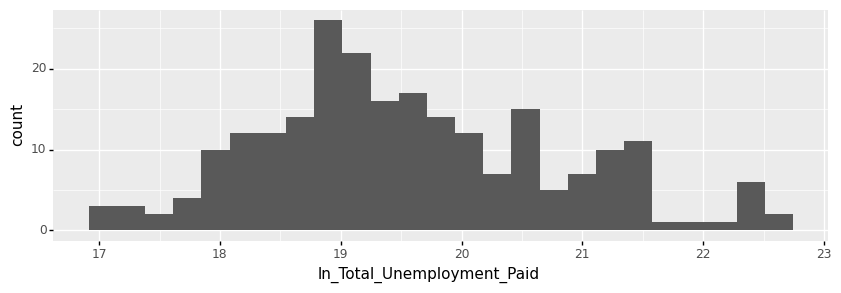

<ggplot: (310300591)>

In [72]:
# Ln(Total Unemployment Paid) because there is a right skew on Total Unemployment Paid
d = train_X.copy()
d['ln_Total_Unemployment_Paid'] =  np.log(d['Total Unemployment Paid'] + 1)
(
    ggplot(d,aes(x="ln_Total_Unemployment_Paid")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

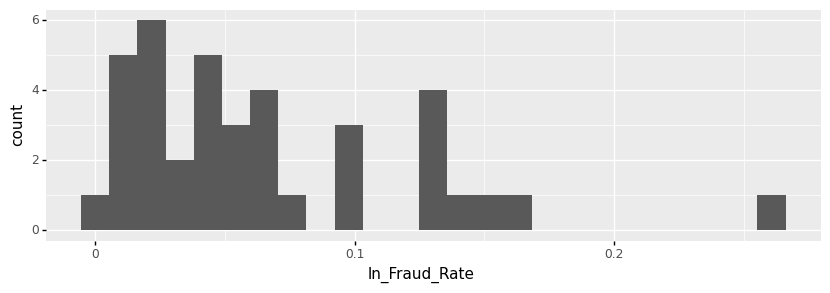

<ggplot: (310363227)>

In [73]:
# Ln(Fraud Rate) because there is a right skew on Fraud Rate
d = train_X.copy()
d['ln_Fraud_Rate'] =  np.log(d['Fraud Rate'] + 1)
(
    ggplot(d,aes(x="ln_Fraud_Rate")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

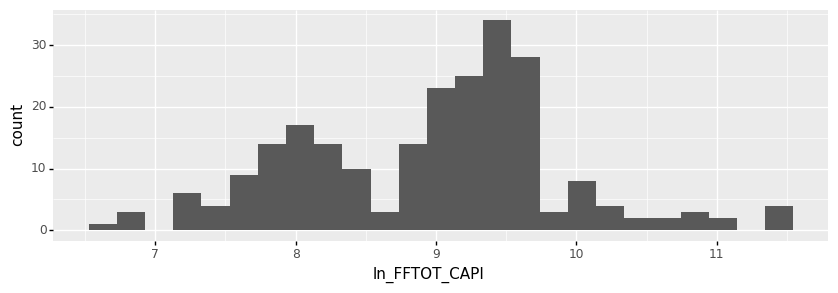

<ggplot: (310410138)>

In [74]:
# Ln(FFTOT_CAPI) because there is a right skew on FFTOT_CAPI
d = train_X.copy()
d['ln_FFTOT_CAPI'] =  np.log(d['FFTOT_CAPI'] + 1)
(
    ggplot(d,aes(x="ln_FFTOT_CAPI")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

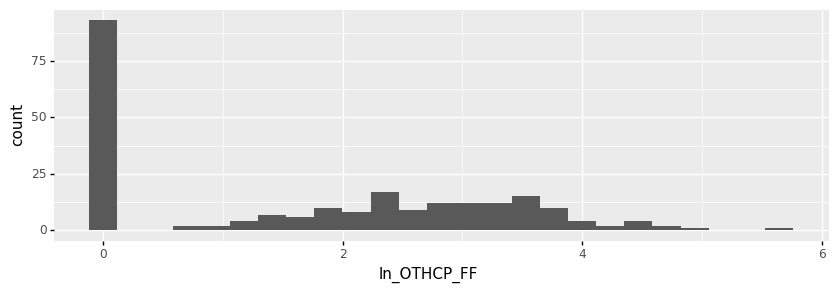

<ggplot: (310427480)>

In [75]:
# Ln(OTHCP_FF) because there is a right skew on OTHCP_FF
d = train_X.copy()
d['ln_OTHCP_FF'] =  np.log(d['OTHCP_FF'] + 1)
(
    ggplot(d,aes(x="ln_OTHCP_FF")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

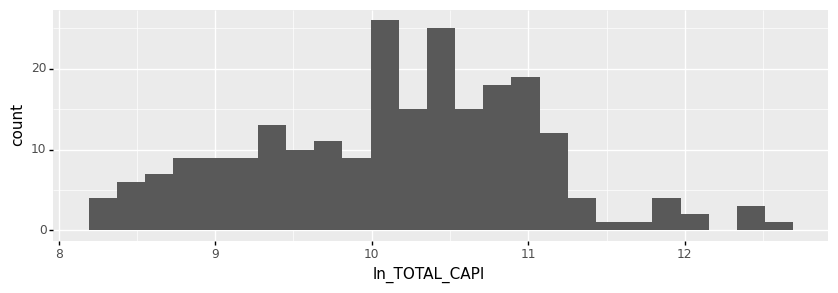

<ggplot: (310468316)>

In [76]:
# Ln(TOTAL_CAPI) because there is a right skew on TOTAL_CAPI
d = train_X.copy()
d['ln_TOTAL_CAPI'] =  np.log(d['TOTAL_CAPI'] + 1)
(
    ggplot(d,aes(x="ln_TOTAL_CAPI")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

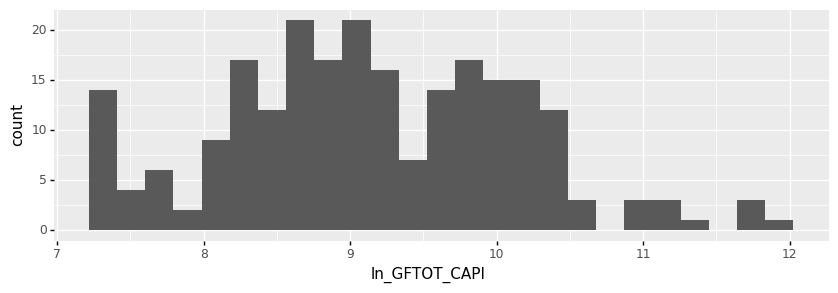

<ggplot: (310394468)>

In [77]:
# Ln(GFTOT_CAPI) because there is a right skew on GFTOT_CAPI
d = train_X.copy()
d['ln_GFTOT_CAPI'] =  np.log(d['GFTOT_CAPI'] + 1)
(
    ggplot(d,aes(x="ln_GFTOT_CAPI")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

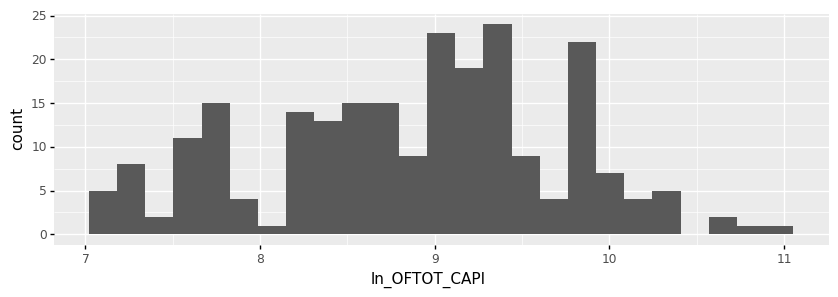

<ggplot: (310553348)>

In [78]:
# Ln(OFTOT_CAPI) because there is a right skew on OFTOT_CAPI
d = train_X.copy()
d['ln_OFTOT_CAPI'] =  np.log(d['OFTOT_CAPI'] + 1)
(
    ggplot(d,aes(x="ln_OFTOT_CAPI")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

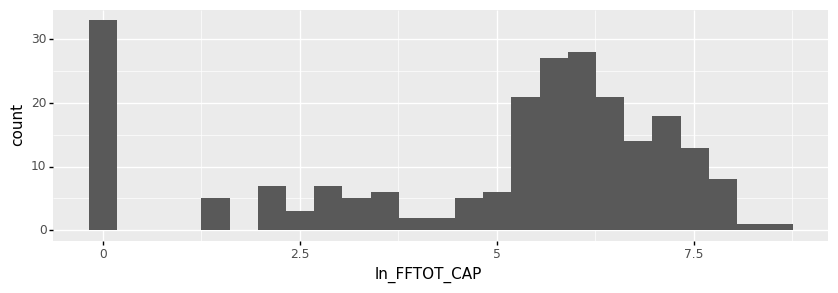

<ggplot: (310426796)>

In [79]:
# Ln(FFTOT_CAP) because there is a right skew on FFTOT_CAP
d = train_X.copy()
d['ln_FFTOT_CAP'] =  np.log(d['FFTOT_CAP'] + 1)
(
    ggplot(d,aes(x="ln_FFTOT_CAP")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

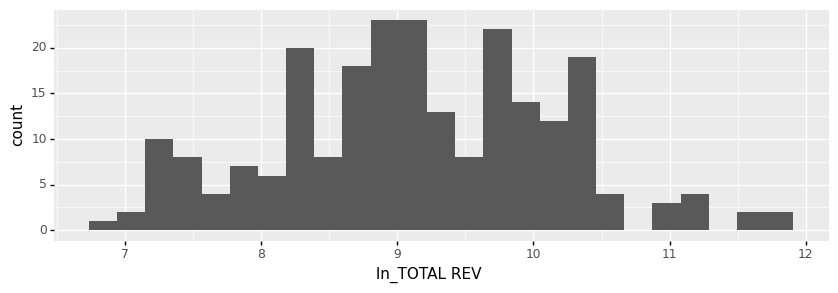

<ggplot: (310460709)>

In [80]:
# Ln(TOTAL REV) because there is a right skew on TOTAL REV
d = train_X.copy()
d['ln_TOTAL REV'] =  np.log(d['TOTAL REV'] + 1)
(
    ggplot(d,aes(x="ln_TOTAL REV")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

In [81]:
# Process party categorical variable
dta_select['party'] = 1*(dta_select['party'] == "Republican")
# Everyone else ("other") is the baseline. 

In [82]:
dta_select.party.value_counts()

0    194
1    117
Name: party, dtype: int64

In [83]:
list(dta_select)

['POPESTIMATE',
 'Amount Overpaid',
 'Total Unemployment Paid',
 'Improper_Payment_Rate',
 'Fraud Rate',
 'Unemploy_Year',
 'State',
 'Code',
 'FFTOT_CAPI',
 'OTHCP_FF',
 'TOTAL_CAPI',
 'GFTOT_CAPI',
 'OFTOT_CAPI',
 'FFTOT_CAP',
 'TOTAL REV',
 'party']

### Refer Variable for State

In [84]:
# Convert categories into dummies
state_dummies = pd.get_dummies(dta_select.State)
state_dummies.columns = [c.lower().replace(" ","_") for c in state_dummies.columns]
state_dummies = state_dummies.drop(['illinois'],axis=1) # Baseline
state_dummies.head(5)

,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,georgia,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
dta_select[dta_select['State'] == 'Illinois']

,POPESTIMATE,Amount Overpaid,Total Unemployment Paid,Improper_Payment_Rate,Fraud Rate,Unemploy_Year,State,Code,FFTOT_CAPI,OTHCP_FF,TOTAL_CAPI,GFTOT_CAPI,OFTOT_CAPI,FFTOT_CAP,TOTAL REV,party
12,12671821,666597532.0,4.286338e+09,0.17683,0.06952,2021,Illinois,IL,18007.700000,0.0,77813.400000,36064.700000,22412.000000,129.000000,38060.0,0
12,12671821,167576600.0,1.653969e+09,0.11315,NaN,2020,Illinois,IL,15983.362989,0.0,71841.951731,36362.000000,18920.064625,90.000000,39195.0,1
12,12671821,143565846.0,1.586002e+09,0.10077,NaN,2019,Illinois,IL,16940.184637,0.0,72782.605628,35408.800000,19899.740991,83.797245,36943.0,1
12,12723071,175203759.0,1.735596e+09,0.10972,NaN,2018,Illinois,IL,14832.555243,0.0,68001.599827,29423.860914,22386.533670,88.930000,30333.0,1
12,12778828,217158872.0,1.826642e+09,0.12185,NaN,2017,Illinois,IL,15875.202486,0.0,54924.080446,26761.592961,11505.559774,107.820000,31290.0,1
16,12820527,196200949.0,1.732521e+09,0.11572,NaN,2016,Illinois,IL,14365.499373,0.0,64943.412709,28901.852755,19194.960581,101.000000,32560.0,1
17,12820527,196200949.0,1.732521e+09,0.11572,NaN,2016,Illinois,IL,14365.499373,0.0,64943.412709,28901.852755,19194.960581,101.000000,32560.0,0


In [86]:
dta_select = dta_select.drop(['State','Code','Fraud Rate',  'Amount Overpaid', 'Total Unemployment Paid'],axis=1)

#'party', 'FFTOT_CAP','OTHCP_FF'

In [87]:
dta_select = pd.concat([dta_select, state_dummies],axis=1)
dta_select

,POPESTIMATE,Improper_Payment_Rate,Unemploy_Year,FFTOT_CAPI,OTHCP_FF,TOTAL_CAPI,GFTOT_CAPI,OFTOT_CAPI,FFTOT_CAP,TOTAL REV,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,4903185,0.23956,2021,12274.00000,0.000,31638.00000,10172.00000,8966.000,277.000,10040.0,...,0,0,0,0,0,0,0,0,0,0
1,731545,0.12459,2021,4807.00000,42.800,11930.20000,5716.00000,1407.200,1076.700,1595.5,...,0,0,0,0,0,0,0,0,0,0
2,7278717,0.25343,2021,16895.00000,0.000,40784.00000,11221.00000,12180.000,900.000,10970.0,...,0,0,0,0,0,0,0,0,0,0
3,3017804,0.24168,2021,9498.46438,0.000,27775.39135,5482.48797,12738.776,205.630,6967.8,...,0,0,0,0,0,0,0,0,0,0
4,39512223,0.08933,2021,148996.02000,40.142,357086.00300,146285.32100,55086.253,1966.142,144375.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,8410106,0.06397,2016,9705.93000,6.030,47051.80000,18598.40000,17658.270,9.100,17735.6,...,0,0,0,0,0,1,0,0,0,0
54,7294771,0.14907,2016,11501.00000,31.000,40082.00000,16671.00000,10428.000,801.000,17283.0,...,0,0,0,0,0,0,1,0,0,0
55,1831023,0.04098,2016,4306.00000,30.000,15948.00000,4237.00000,7328.000,484.000,4254.0,...,0,0,0,0,0,0,0,1,0,0
56,5772628,0.19522,2016,11063.20000,0.000,46083.10000,15333.90000,19686.000,0.000,14541.0,...,0,0,0,0,0,0,0,0,1,0


### Divide data again after transformations

In [88]:
y = dta_select[['Improper_Payment_Rate']]
X = dta_select.drop(columns=['Improper_Payment_Rate'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=1800)

In [89]:
# Check data divided properly
print(train_X.shape[0]/dta_select.shape[0])
print(test_X.shape[0]/dta_select.shape[0])

0.7491961414790996
0.2508038585209003


## Build a machine learning pipeline

In [90]:
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

In [91]:
# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['POPESTIMATE',
 'Unemploy_Year',
 'FFTOT_CAPI',
 'OTHCP_FF',
 'TOTAL_CAPI',
 'GFTOT_CAPI',
 'OFTOT_CAPI',
 'FFTOT_CAP',
 'TOTAL REV',
 'party', 'POPESTIMATE'])])

In [92]:
# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])

In [93]:
# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]

### 4. Run the following supervised statistical learning algorithms using any subse

In [94]:
# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

In [95]:
train_X

,POPESTIMATE,Unemploy_Year,FFTOT_CAPI,OTHCP_FF,TOTAL_CAPI,GFTOT_CAPI,OFTOT_CAPI,FFTOT_CAP,TOTAL REV,party,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
22,4438182,2016,11827.000000,0.0,30811.000000,10046.000000,8938.000000,0.00,9967.000000,1,...,0,0,0,0,0,0,0,0,0,0
7,973764,2020,2402.500000,0.0,11324.900000,4394.400000,4231.000000,292.00,4592.000000,0,...,0,0,0,0,0,0,0,0,0,0
36,3956971,2019,7522.000000,30.0,22669.000000,5854.000000,8915.000000,495.00,5854.000000,1,...,0,0,0,0,0,0,0,0,0,0
9,10617423,2020,15108.942751,0.0,56932.322786,27951.126986,12688.193049,0.00,25571.064702,1,...,0,0,0,0,0,0,0,0,0,0
49,6646010,2016,12052.000000,2.0,30840.000000,12837.000000,5867.000000,876.00,12496.000000,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2908718,2017,3637.000000,18.0,15124.400000,6115.400000,4958.000000,295.00,6073.000000,1,...,0,0,0,0,0,0,0,0,0,0
3,3001345,2017,7415.966586,0.0,24035.531848,5170.072060,11391.752795,363.91,6453.900000,0,...,0,0,0,0,0,0,0,0,0,0
32,2092741,2018,8128.000000,12.0,19697.000000,6065.000000,4842.000000,470.00,5885.400000,1,...,0,0,0,0,0,0,0,0,0,0
6,3573297,2017,6216.000000,0.0,31871.800000,17921.000000,4042.800000,487.00,17781.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
train_X

,POPESTIMATE,Unemploy_Year,FFTOT_CAPI,OTHCP_FF,TOTAL_CAPI,GFTOT_CAPI,OFTOT_CAPI,FFTOT_CAP,TOTAL REV,party,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
22,4438182,2016,11827.000000,0.0,30811.000000,10046.000000,8938.000000,0.00,9967.000000,1,...,0,0,0,0,0,0,0,0,0,0
7,973764,2020,2402.500000,0.0,11324.900000,4394.400000,4231.000000,292.00,4592.000000,0,...,0,0,0,0,0,0,0,0,0,0
36,3956971,2019,7522.000000,30.0,22669.000000,5854.000000,8915.000000,495.00,5854.000000,1,...,0,0,0,0,0,0,0,0,0,0
9,10617423,2020,15108.942751,0.0,56932.322786,27951.126986,12688.193049,0.00,25571.064702,1,...,0,0,0,0,0,0,0,0,0,0
49,6646010,2016,12052.000000,2.0,30840.000000,12837.000000,5867.000000,876.00,12496.000000,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2908718,2017,3637.000000,18.0,15124.400000,6115.400000,4958.000000,295.00,6073.000000,1,...,0,0,0,0,0,0,0,0,0,0
3,3001345,2017,7415.966586,0.0,24035.531848,5170.072060,11391.752795,363.91,6453.900000,0,...,0,0,0,0,0,0,0,0,0,0
32,2092741,2018,8128.000000,12.0,19697.000000,6065.000000,4842.000000,470.00,5885.400000,1,...,0,0,0,0,0,0,0,0,0,0
6,3573297,2017,6216.000000,0.0,31871.800000,17921.000000,4042.800000,487.00,17781.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# (6) Fit the model to the training data
search.fit(train_X,train_y)

/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['POPESTIMATE',
                                                                          'Unemploy_Year',
                                                                          'FFTOT_CAPI',
                                                                          'OTHCP_FF',
                                                                          'TOTAL_CAPI',
                                                                          'GFTOT_CAPI',
                                                                          'OFTOT_CAPI',
                                                                          'FFTOT_CAP',
    

### 5. Identify which model performed the best using the area under the ROC curve (AUC) metric 

In [98]:
# Best ROC AUC
search.best_score_

-0.003984229160269379

In [99]:
search.best_params_

{'model': BaggingRegressor()}

In [100]:
best_mod = search.best_estimator_

# Test Performance

Let's assume that our work is all done. We scanned the tuning parameters for all our candidate models and found the best performing model. Let's now see how well it does on the test data that it wasn't trained on. 

Note that our new data is automatically preprocessed before being fit thanks to setting everything up as a pipeline!

In [101]:
# Predict() method will use the best model out of the scan
pred_y = search.predict(test_X)

In [102]:
m.mean_squared_error(test_y,pred_y)

0.004081370611948717

In [103]:
m.r2_score(test_y,pred_y)

0.31958193255497525

In [104]:
col_names = list(train_X)

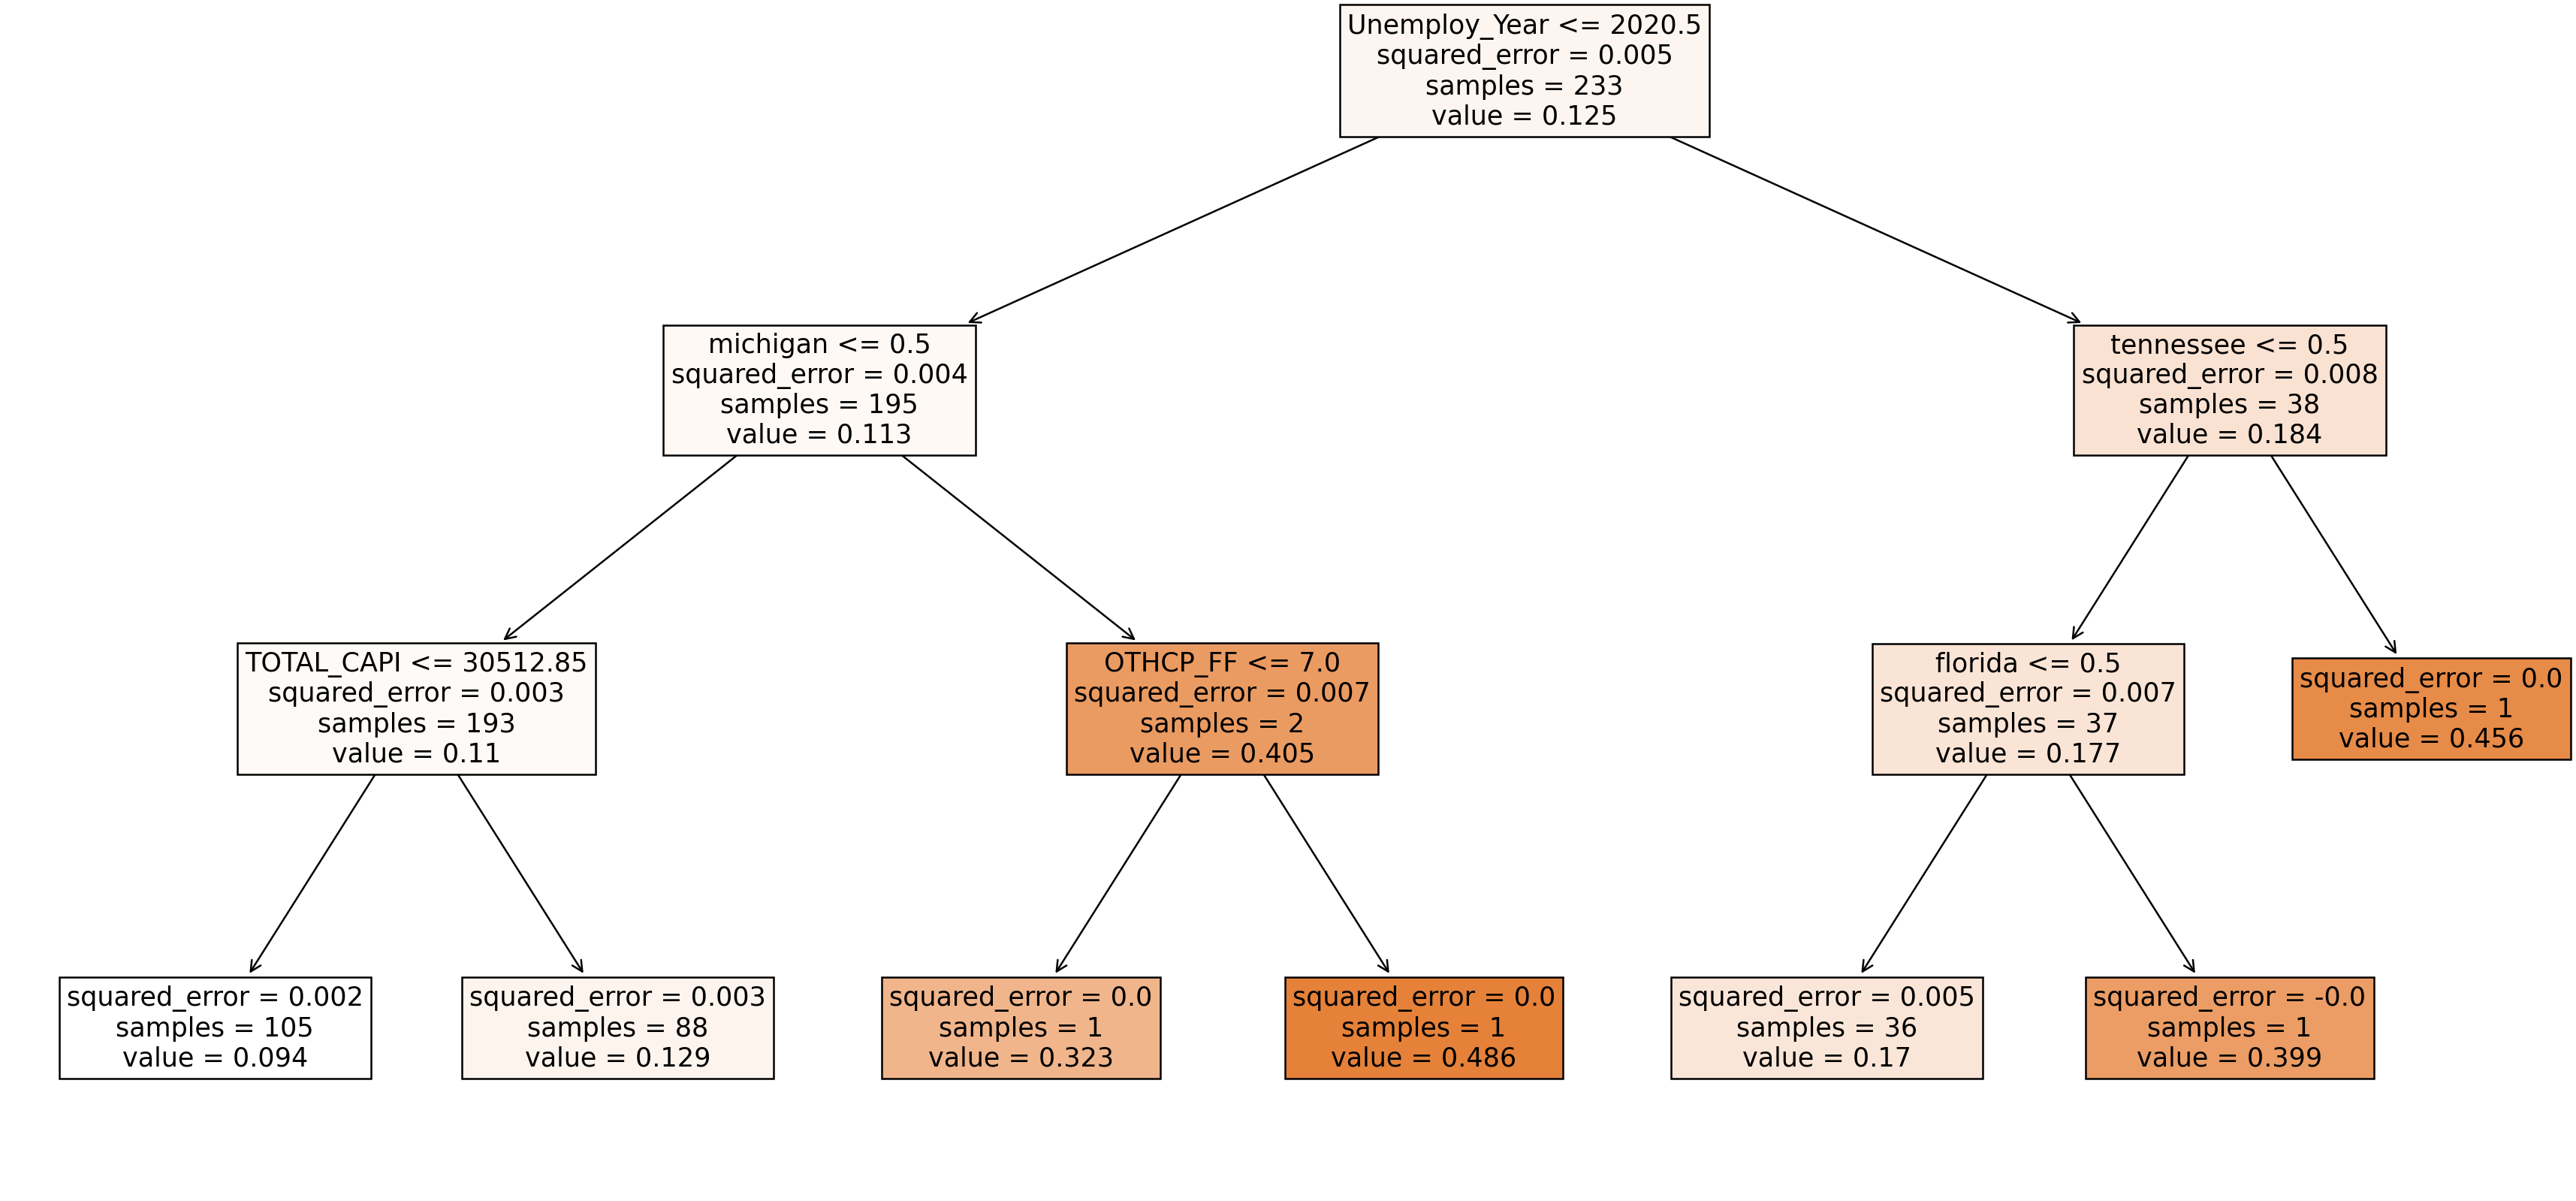

In [105]:
mod = DTree(max_depth=3) # Initialize the modeling object (just as we did)
mod.fit(train_X,train_y) # Fit the mode

# Plot the tree
plt.figure(figsize=(10,5),dpi=180)
rules = tree.plot_tree(mod,feature_names = col_names, fontsize=14, filled = True)

### Decision Tree

In [106]:
use_metrics = ["neg_mean_squared_error"]

In [107]:
dt_scores = cross_validate(DTree(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

# 0. Appendix

In [108]:
# Load first dataset (Source: https://www.kff.org/statedata/custom-state-report/?32139-year-=2019&view=3&i=32148~460185~32141~32139~32132~32136&g=us~al~ak~az~ar~ca~co~ct~de~dc~fl~ga~hi~id~il~in~ia~ks~ky~la~me~md~ma~mi~mn~ms~mo~mt~ne~nv~nh~nj~nm~ny~nc~nd~oh~ok~or~pa~ri~sc~sd~tn~tx~ut~vt~va~wa~wv~wi~wy)
Poverty_Expenditure = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/statehealthfacts.xlsx')
dta = Poverty_Expenditure.melt(id_vars="Unnamed: 0")
dta = dta.rename(columns={"Unnamed: 0": "Features", "variable": "State"})
pv = dta.pivot_table(index=["State"], 
                    columns='Features', 
                    values='value')
Poverty_Expenditure = pv

In [109]:
Poverty_Expenditure.head()

Features,Poverty Rate by Age: 65+,Poverty Rate by Age: Adults 19-64,Poverty Rate by Age: Children 0-18,Poverty Rate by Age: Total,Poverty Rate by Race/Ethnicity: American Indian/Alaska Native,Poverty Rate by Race/Ethnicity: Asian/Native Hawaiian and Pacific Islander,Poverty Rate by Race/Ethnicity: Black,Poverty Rate by Race/Ethnicity: Hispanic,Poverty Rate by Race/Ethnicity: Multiple Races,Poverty Rate by Race/Ethnicity: Total,Poverty Rate by Race/Ethnicity: White,Total State Expenditures (in millions)
State,,,,,,,,,,,,
Alabama,0.105,0.148,0.208,0.154,0.156,0.107,0.236,0.244,0.186,0.154,0.115,28834.0
Alaska,0.083,0.101,0.133,0.107,0.240,NaN,NaN,0.149,0.069,0.107,0.069,11148.0
Arizona,0.091,0.126,0.187,0.134,0.290,0.115,0.175,0.182,0.153,0.134,0.092,38691.0
Arkansas,0.103,0.156,0.230,0.165,0.155,0.125,0.289,0.201,0.227,0.165,0.134,25639.0
California,0.104,0.106,0.157,0.118,0.203,0.090,0.193,0.150,0.107,0.118,0.084,300445.0


In [110]:
state_abbrev.head(2)

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK


In [111]:
fullData = Poverty_Expenditure.merge(Unemployment_Data, left_on='State', right_on='State', how='left')

NameError: name 'Unemployment_Data' is not defined

In [ ]:
fullData

In [ ]:
# define the url and ready data
url = "https://ballotpedia.org/Total_state_government_expenditures#Fiscal_year_2017"


In [ ]:
## Scrape statebudgets from '17-'14

url = "https://ballotpedia.org/Total_state_government_expenditures#Fiscal_year_2017"
cities = pd.read_html(url)

cities

cities[4]